# Multivariate Time Series Unsupervised Feature Selection Methods Comparison

In [1]:
print('hello world')

hello world


In [28]:
import os
import matplotlib.pyplot as plt
import pandas as pd # for using pandas daraframe
import numpy as np # for some mathematical operations
from sklearn.preprocessing import StandardScaler # for standardizing the data
from sklearn.decomposition import PCA # for PCA calculation
from sklearn.pipeline import make_pipeline
#from sklearn.feature_selection import mutual_info_classif #cannot use, since target variable is required
from sklearn.feature_selection import mutual_info_regression


import aeon
from aeon.datasets import load_from_tsfile

from scipy.stats import pearsonr, spearmanr
import seaborn as sns



In [3]:
DATA_PATH = "C:/Users/User/OneDrive - Universidad de Monterrey/Documentos/Uni Stuttgart/Studienarbeit/Studienarbeit_Code/datasets"

train_x, train_y = load_from_tsfile(DATA_PATH + "/MotionSenseHAR/MotionSenseHAR_TRAIN.ts")
test_x, test_y = load_from_tsfile(DATA_PATH + "/MotionSenseHAR/MotionSenseHAR_TEST.ts")


In [4]:
train_x[0]

array([[ 1.528132,  1.527992,  1.527765, ...,  1.242636,  1.172438,
         1.088215],
       [-0.733896, -0.716987, -0.706999, ..., -0.606728, -0.604834,
        -0.590965],
       [ 0.696372,  0.677762,  0.670951, ..., -2.673003, -2.664214,
        -2.658315],
       ...,
       [ 0.294894,  0.219405,  0.010714, ..., -0.178695,  0.016807,
         0.549265],
       [-0.184493,  0.035846,  0.134701, ...,  0.007637,  0.077783,
         0.142422],
       [ 0.377542,  0.114866, -0.167808, ...,  0.353873,  0.264784,
        -0.060651]])

In [5]:
np.shape(train_x)

(966, 12, 1000)

In [6]:
train_y[0]

'dws'

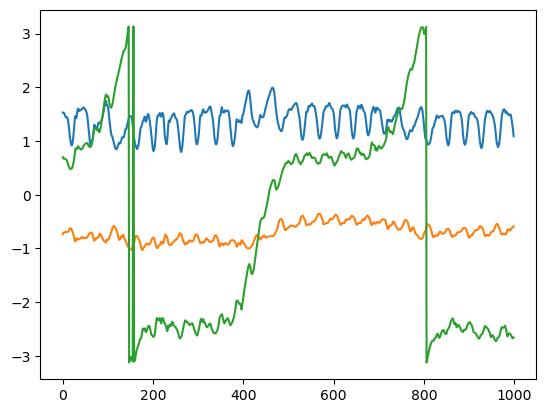

In [7]:
plt.plot(train_x[0][0])
plt.plot(train_x[0][1])
plt.plot(train_x[0][2])


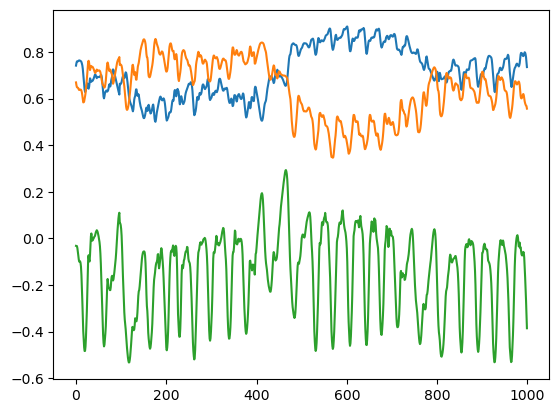

In [8]:
plt.plot(train_x[0][3])
plt.plot(train_x[0][4])
plt.plot(train_x[0][5])

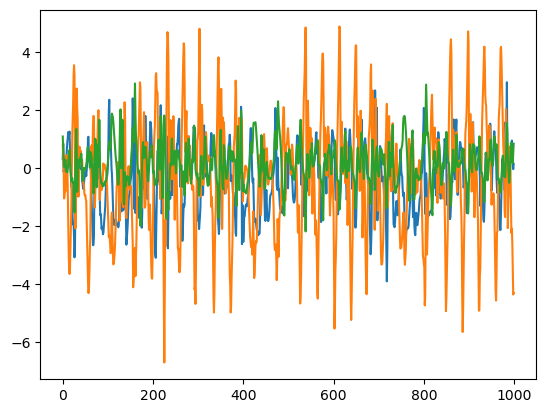

In [9]:
plt.plot(train_x[0][6])
plt.plot(train_x[0][7])
plt.plot(train_x[0][8])


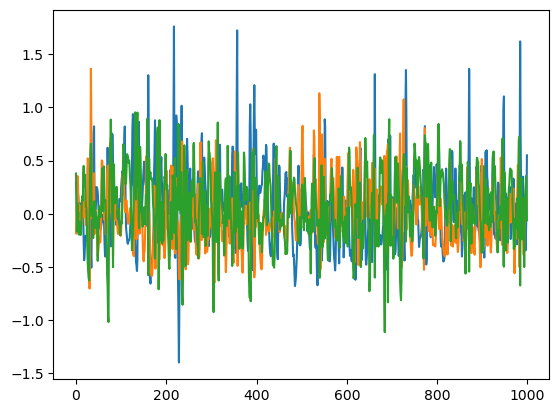

In [10]:
plt.plot(train_x[0][9])
plt.plot(train_x[0][10])
plt.plot(train_x[0][11])

In [11]:
train_x_transposed = np.transpose(train_x, axes=(0, 2, 1))
reshaped_array = train_x_transposed.reshape(-1, train_x.shape[1])
df = pd.DataFrame(reshaped_array)
#print(df)
#print(np.shape(df))
#for col in df.columns[:3]:
#    plt.plot(df.index[:1000], df[col][:1000], label=col)

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

pca = PCA(n_components=10)
pca.fit(df_scaled)

loadings_matrix = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=df.columns)
print(loadings_matrix)


         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.339545 -0.488585 -0.006987  0.191639  0.038781 -0.090682  0.022940   
1   0.461885  0.500808 -0.026650 -0.007805 -0.022570  0.080259 -0.027629   
2   0.071069  0.121842 -0.026668  0.122364 -0.226100 -0.912614  0.268401   
3   0.451431 -0.392592 -0.003603  0.194887  0.033858  0.033475 -0.000115   
4  -0.450872 -0.509467  0.029706 -0.001904  0.030833 -0.090898  0.035240   
5  -0.480307  0.203325 -0.046737  0.005070 -0.068542 -0.039457  0.013252   
6   0.000094  0.018209  0.684893 -0.072657 -0.124915 -0.013799 -0.050214   
7  -0.019852 -0.046511 -0.315174  0.086656 -0.416771 -0.118439 -0.805769   
8   0.018876  0.009224  0.644756  0.033986  0.002511 -0.126216 -0.381186   
9  -0.119361  0.128458  0.032594  0.565998  0.466343 -0.047269 -0.056543   
10 -0.031599 -0.038228  0.099176  0.277115 -0.729664  0.311847  0.351900   
11  0.112049 -0.141640 -0.020693 -0.706499  0.029622 -0.109081  0.033707   

         PC

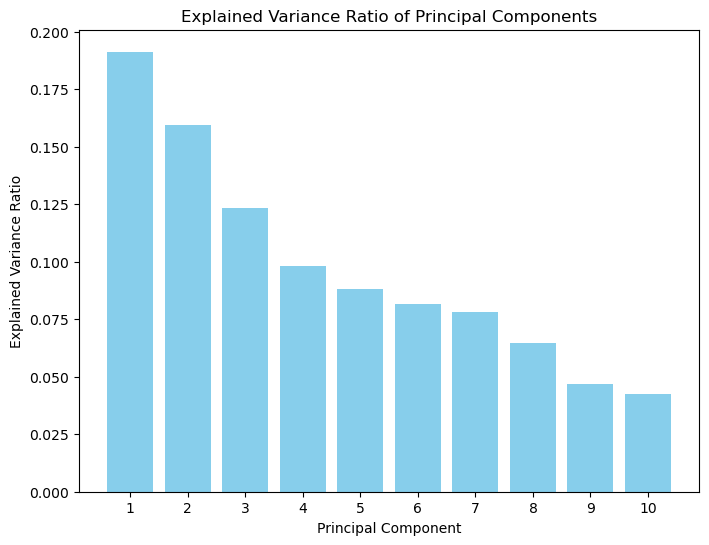

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

In [25]:
data=scaler.fit_transform(train_x.reshape(-1, 1000)).reshape(train_x.shape)

correlation_matrix = np.zeros((12, 12))  
for i in range(12):
    for j in range(12):
        # Calculate the correlation coefficient between features using Pearson's correlation
        correlation, _ = pearsonr(data[:, i, :].flatten(), data[:, j, :].flatten())
        correlation_matrix[i, j] = correlation

average_correlations = np.mean(correlation_matrix, axis=1)  

num_top_features = 6  # Set the number of top features to select
top_feature_indices = np.argsort(average_correlations)[::-1][:num_top_features]
selected_features = list(top_feature_indices)

print("Selected features:", selected_features)


Selected features: [8, 0, 6, 3, 10, 2]


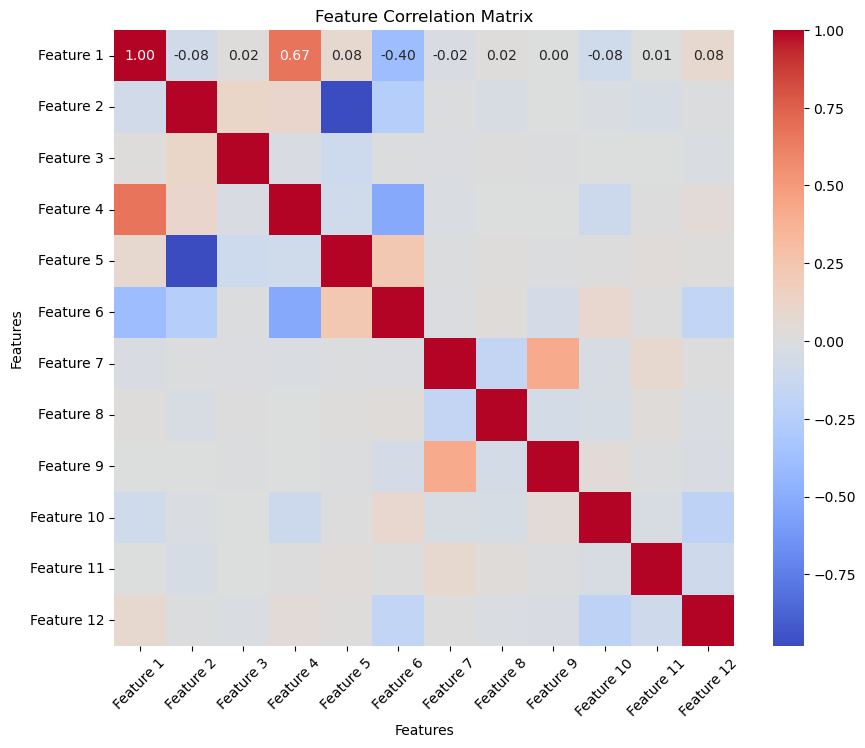

In [21]:
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=feature_names, yticklabels=feature_names)
plt.title("Feature Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


SPEARMAN 

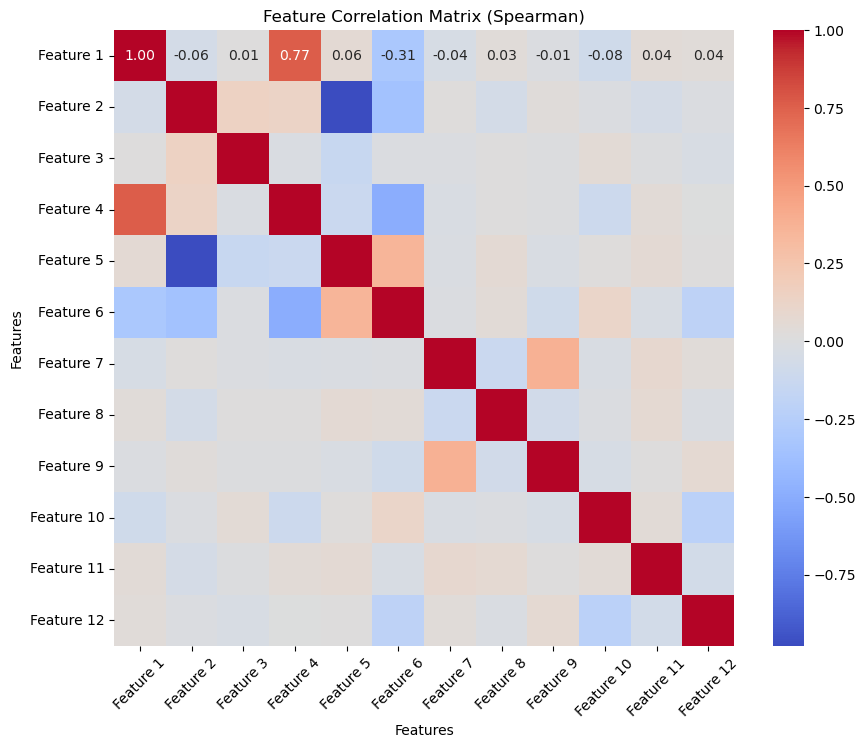

In [22]:
for i in range(12):
    for j in range(12):
        # Calculate the correlation coefficient between features using Spearman's correlation
        correlation, _ = spearmanr(data[:, i, :].flatten(), data[:, j, :].flatten())
        correlation_matrix[i, j] = correlation

# Step 3: Visualize the correlation matrix
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=feature_names, yticklabels=feature_names)
plt.title("Feature Correlation Matrix (Spearman)")
plt.xlabel("Features")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [24]:
num_top_features = 6  # Set the number of top features to select
top_feature_indices = np.argsort(average_correlations)[::-1][:num_top_features]
selected_features = list(top_feature_indices)

print("Selected features:", selected_features)

Selected features: [8, 0, 6, 3, 10, 2]


MUTUAL INFORMATION

In [36]:
n_instances = 966
n_features = 12
n_time_points = 1000

reshaped_data = data.reshape(n_instances, n_features * n_time_points)

# Step 1: Calculate mutual information scores
feature_scores = mutual_info_regression(reshaped_data, np.arange(n_instances))

# Reshape the feature_scores array back to match the original feature shape
feature_scores = feature_scores.reshape(n_features, n_time_points)

# Step 2: Calculate the average mutual information score for each original feature
average_feature_scores = np.mean(feature_scores, axis=1)

# Step 3: Select top features
num_top_features = 5  # Set the number of top features to select
top_feature_indices = np.argsort(average_feature_scores)[-num_top_features:]

# Print the indices of the selected features
print("Indices of selected features:", top_feature_indices)

Indices of selected features: [1 4 0 2 5]


In [37]:
# Step 3: Select top features
num_top_features = 6  # Set the number of top features to select
top_feature_indices = np.argsort(average_feature_scores)[-num_top_features:]

# Print the indices of the selected features
print("Indices of selected features:", top_feature_indices)

Indices of selected features: [3 1 4 0 2 5]


In [49]:
n_instances = 966
n_features = 12
n_time_points = 1000

# Reshape the data into a 3D array where the dimensions are (instances, features, time points)
reshaped_data = data.reshape(n_instances, n_features, n_time_points)

# Initialize an array to store the cumulative cross-correlation values between pairs of features
cross_corr_sum = np.zeros((n_features, n_features))

# Iterate over instances and update the cross-correlation values incrementally
for i in range(n_instances):
    instance = reshaped_data[i]
    cross_corr_instance = np.corrcoef(instance)
    cross_corr_sum += cross_corr_instance

# Aggregate the cross-correlation values across instances
cross_corr_avg = cross_corr_sum / n_instances

# Choose features with high cross-correlation values
threshold = 0.6  # Adjust the threshold as needed
selected_features = np.where(np.abs(cross_corr_avg) > threshold)

# Print selected features
print("Selected features:")
for feature_pair in zip(selected_features[0], selected_features[1]):
    print("Feature pair:", feature_pair)

Selected features:
Feature pair: (0, 0)
Feature pair: (1, 1)
Feature pair: (1, 4)
Feature pair: (2, 2)
Feature pair: (3, 3)
Feature pair: (4, 1)
Feature pair: (4, 4)
Feature pair: (5, 5)
Feature pair: (6, 6)
Feature pair: (7, 7)
Feature pair: (8, 8)
Feature pair: (9, 9)
Feature pair: (10, 10)
Feature pair: (11, 11)


## Clustering based

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [69]:
reshaped_data = data.reshape(data.shape[0], -1)

# Choose the number of clusters (k)
num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reshaped_data)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(reshaped_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.15959765280819788


In [71]:
reshaped_data.shape

(966, 12000)

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


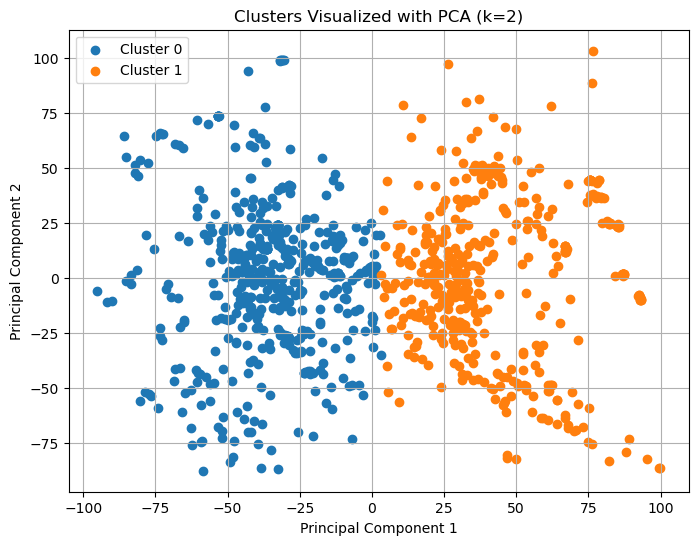

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


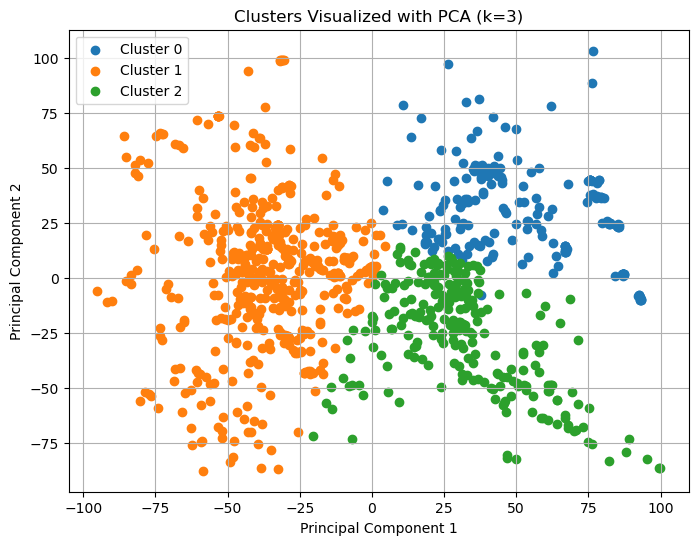

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


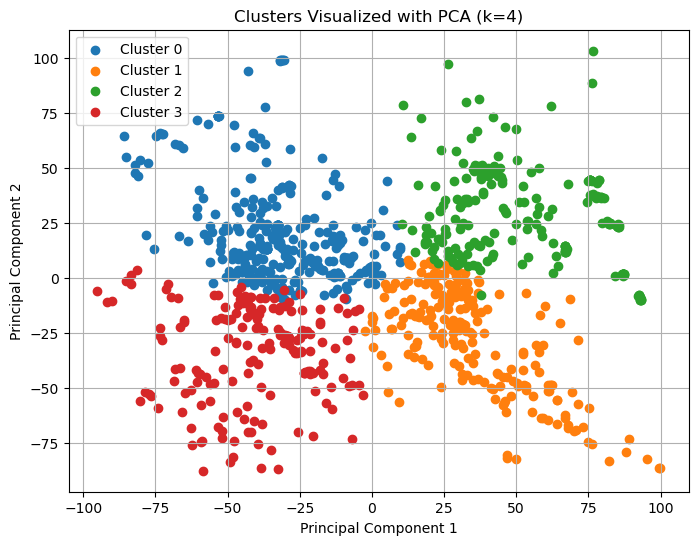

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


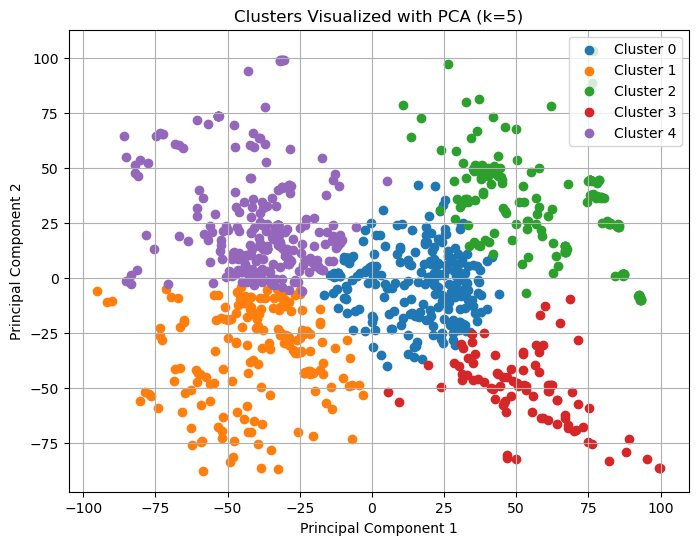

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


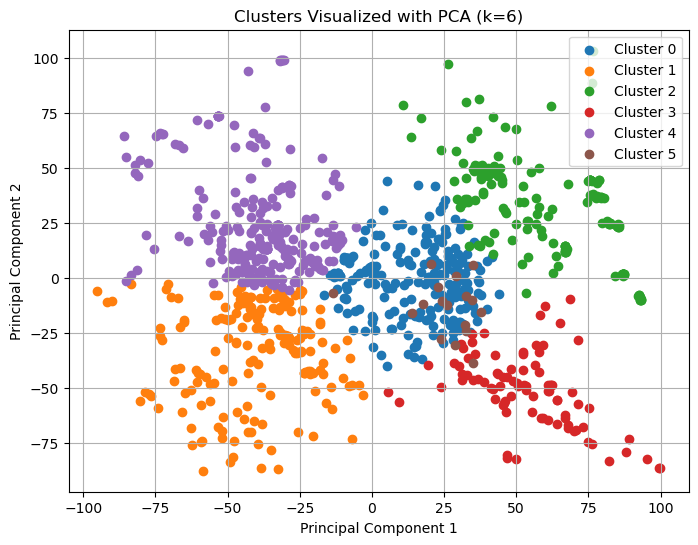

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


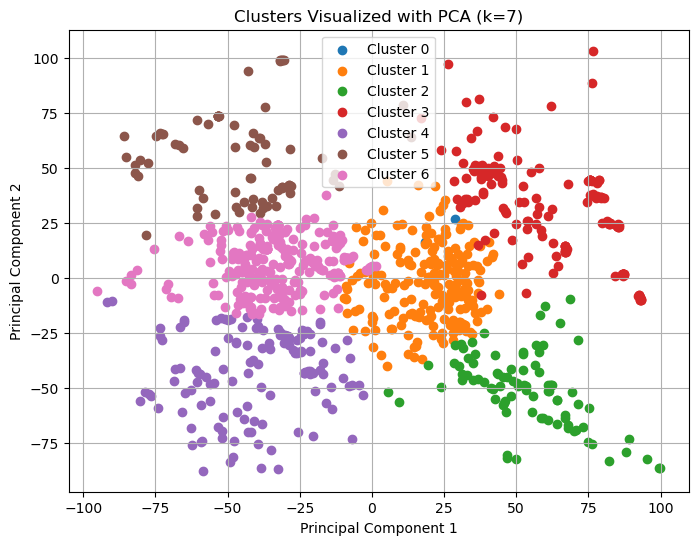

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


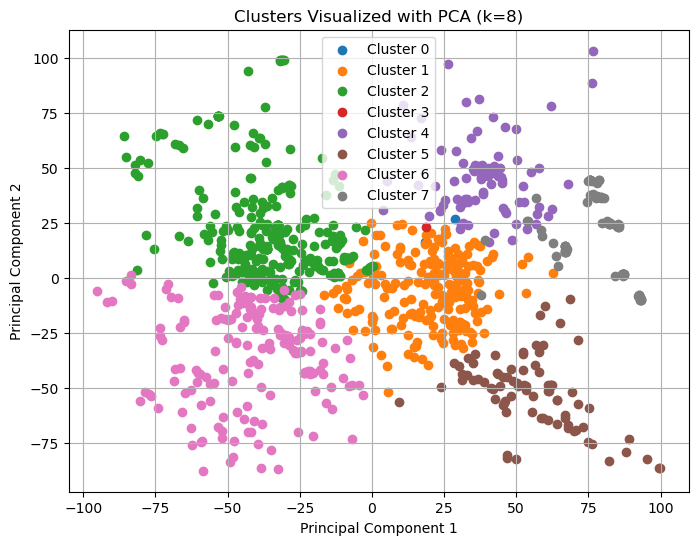

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


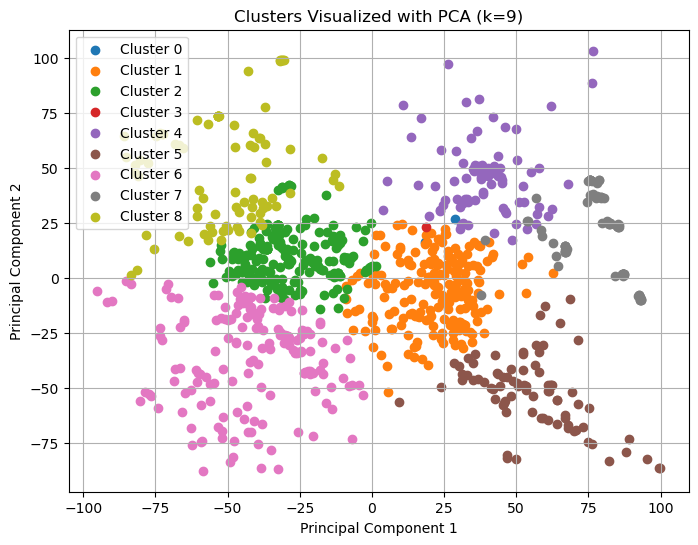

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


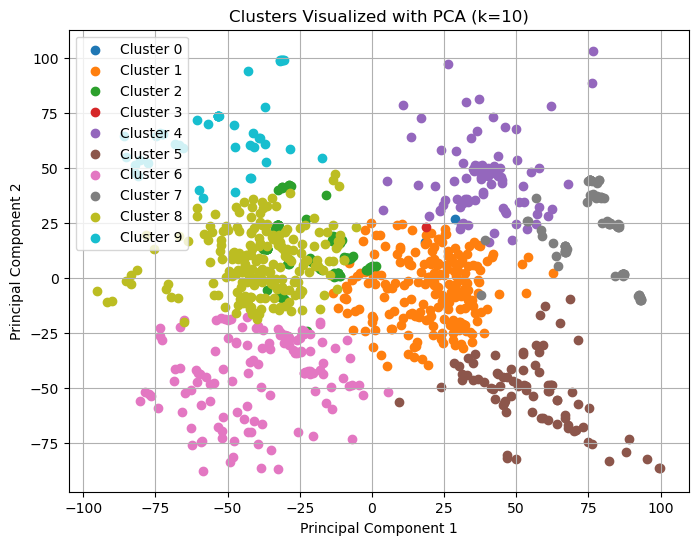

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


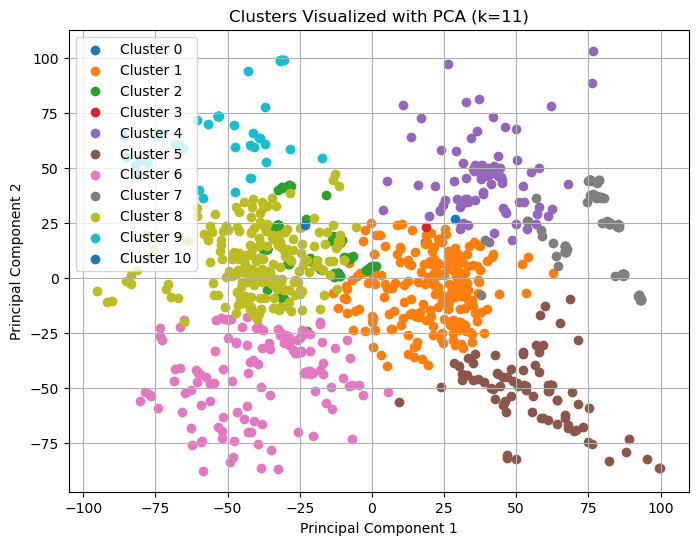

d:\Anaconda\envs\aeon-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


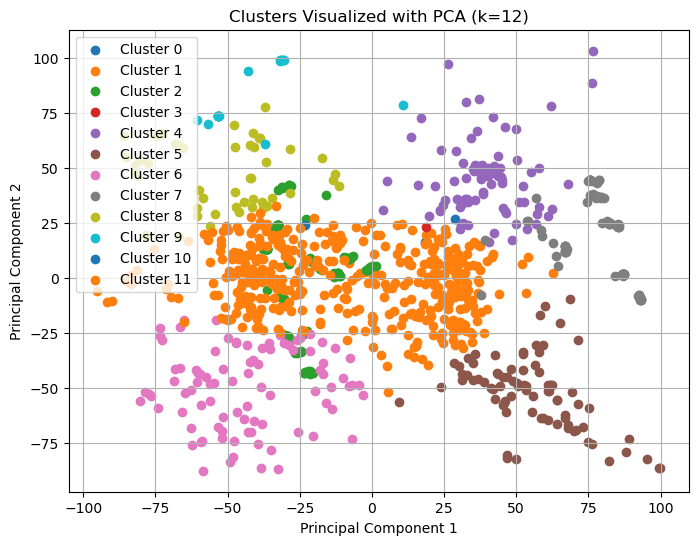

    k  Silhouette Score
0   2          0.176985
0   3          0.159598
0   4          0.112999
0   5          0.087048
0   6          0.088877
0   7          0.087838
0   8          0.093529
0   9          0.086270
0  10          0.040268
0  11          0.040732
0  12          0.060977


In [62]:
min_clusters = 2
max_clusters = 12

# Initialize an empty DataFrame to store silhouette scores
silhouette_scores_df = pd.DataFrame(columns=['k', 'Silhouette Score'])

# Iterate over different values of k
for k in range(min_clusters, max_clusters + 1):
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(reshaped_data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(reshaped_data, cluster_labels)
    
    # Store silhouette score in the DataFrame
    silhouette_scores_df = pd.concat([silhouette_scores_df, pd.DataFrame({'k': [k], 'Silhouette Score': [silhouette_avg]})])
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(reshaped_data)
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(pca_result[cluster_labels == i, 0], pca_result[cluster_labels == i, 1], label=f'Cluster {i}')
    plt.title(f'Clusters Visualized with PCA (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
# Print the table of silhouette scores
print(silhouette_scores_df)


New try